# Xception TL

In [1]:
from brainprint.dl.load import read_dataset
from tensorflow import keras
from brainprint.dl.hyperxception import run_hyper_xception
from brainprint.dl.utils import VOLUME_SHAPE
from tensorflow_addons.metrics import RSquare

In [2]:
train, validation, test = read_dataset(target="personality")

2023-01-26 17:35:49.911633: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-26 17:35:50.372020: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6725 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080, pci bus id: 0000:26:00.0, compute capability: 6.1


## Sex

In [3]:
sex_model = keras.models.load_model("/home/zvi/Projects/lab/HyperXception/Sex/final")
sex_model.trainable = False

In [4]:
embedded_layer = sex_model.layers[-2].output
dropout = keras.layers.Dropout(rate=0.5)(embedded_layer)
prediction_layer = keras.layers.Dense(
    units=5, activation="linear", name="prediction_layer"
)(dropout)
new_model = keras.models.Model(inputs=sex_model.input, outputs=prediction_layer)

In [5]:
new_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-6),
    loss=keras.losses.MeanSquaredError(),
    metrics=[keras.metrics.MeanAbsoluteError(), RSquare()],    
)

In [6]:
stop_early = keras.callbacks.EarlyStopping(
    patience=4,
    restore_best_weights=True,
)
callbacks = [stop_early]

In [7]:
history = new_model.fit(train, epochs=50, validation_data=validation, callbacks=callbacks)

Epoch 1/50


2023-01-26 17:36:03.754592: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 357 of 1000
2023-01-26 17:36:13.779128: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 692 of 1000
2023-01-26 17:36:19.861377: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.
2023-01-26 17:36:20.251546: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8700


113/113 [==============================] - 42s 117ms/step - loss: 6.5923 - mean_absolute_error: 2.3707 - r_square: -18.9059 - val_loss: 2.7836 - val_mean_absolute_error: 1.4834 - val_r_square: -7.6184
Epoch 2/50


2023-01-26 17:36:44.109414: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 349 of 1000
2023-01-26 17:36:54.099040: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 706 of 1000


  3/113 [..............................] - ETA: 5s - loss: 2.6022 - mean_absolute_error: 1.3932 - r_square: -6.5087    

2023-01-26 17:36:59.224312: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 32s 60ms/step - loss: 1.8064 - mean_absolute_error: 1.1284 - r_square: -4.3696 - val_loss: 1.0841 - val_mean_absolute_error: 0.8595 - val_r_square: -2.2401
Epoch 3/50


2023-01-26 17:37:16.197778: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 350 of 1000
2023-01-26 17:37:26.237963: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 660 of 1000


  2/113 [..............................] - ETA: 5s - loss: 1.3778 - mean_absolute_error: 0.9883 - r_square: -3.0285   

2023-01-26 17:37:32.567785: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 33s 59ms/step - loss: 1.0299 - mean_absolute_error: 0.8332 - r_square: -1.9320 - val_loss: 0.8498 - val_mean_absolute_error: 0.7594 - val_r_square: -1.5071
Epoch 4/50


2023-01-26 17:37:49.425464: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 346 of 1000
2023-01-26 17:37:59.449205: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 697 of 1000


  3/113 [..............................] - ETA: 5s - loss: 0.8760 - mean_absolute_error: 0.7720 - r_square: -2.1677  

2023-01-26 17:38:05.371921: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 33s 61ms/step - loss: 0.8652 - mean_absolute_error: 0.7577 - r_square: -1.4327 - val_loss: 0.7578 - val_mean_absolute_error: 0.7090 - val_r_square: -1.2258
Epoch 5/50


2023-01-26 17:38:22.303654: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 355 of 1000
2023-01-26 17:38:32.323921: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 709 of 1000


  3/113 [..............................] - ETA: 5s - loss: 0.8227 - mean_absolute_error: 0.7334 - r_square: -1.3842  

2023-01-26 17:38:38.084109: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 32s 59ms/step - loss: 0.8030 - mean_absolute_error: 0.7259 - r_square: -1.2474 - val_loss: 0.6928 - val_mean_absolute_error: 0.6722 - val_r_square: -1.0248
Epoch 6/50


2023-01-26 17:38:54.736134: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 326 of 1000
2023-01-26 17:39:04.712795: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 674 of 1000


  3/113 [..............................] - ETA: 5s - loss: 0.7564 - mean_absolute_error: 0.6920 - r_square: -1.3561  

2023-01-26 17:39:10.799642: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 33s 60ms/step - loss: 0.7551 - mean_absolute_error: 0.7008 - r_square: -1.0945 - val_loss: 0.6487 - val_mean_absolute_error: 0.6461 - val_r_square: -0.8890
Epoch 7/50


2023-01-26 17:39:27.585108: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 351 of 1000
2023-01-26 17:39:37.576823: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 715 of 1000


  3/113 [..............................] - ETA: 5s - loss: 0.9113 - mean_absolute_error: 0.7897 - r_square: -1.1365   

2023-01-26 17:39:42.885784: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 32s 60ms/step - loss: 0.7041 - mean_absolute_error: 0.6753 - r_square: -0.9528 - val_loss: 0.6214 - val_mean_absolute_error: 0.6299 - val_r_square: -0.8021
Epoch 8/50


2023-01-26 17:39:59.713661: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 352 of 1000
2023-01-26 17:40:09.705115: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 699 of 1000


  2/113 [..............................] - ETA: 6s - loss: 0.7503 - mean_absolute_error: 0.7074 - r_square: -1.2166   

2023-01-26 17:40:15.806700: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 33s 60ms/step - loss: 0.6821 - mean_absolute_error: 0.6588 - r_square: -0.8735 - val_loss: 0.6023 - val_mean_absolute_error: 0.6182 - val_r_square: -0.7454
Epoch 9/50


2023-01-26 17:40:32.698053: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 352 of 1000
2023-01-26 17:40:42.684083: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 713 of 1000


  3/113 [..............................] - ETA: 5s - loss: 0.6865 - mean_absolute_error: 0.6661 - r_square: -0.9205  

2023-01-26 17:40:48.086800: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 32s 60ms/step - loss: 0.6659 - mean_absolute_error: 0.6526 - r_square: -0.8341 - val_loss: 0.5867 - val_mean_absolute_error: 0.6083 - val_r_square: -0.6962
Epoch 10/50


2023-01-26 17:41:04.944269: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 326 of 1000
2023-01-26 17:41:14.944984: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 645 of 1000


  3/113 [..............................] - ETA: 5s - loss: 0.6141 - mean_absolute_error: 0.6265 - r_square: -0.6926  

2023-01-26 17:41:22.737525: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 35s 61ms/step - loss: 0.6314 - mean_absolute_error: 0.6350 - r_square: -0.7317 - val_loss: 0.5772 - val_mean_absolute_error: 0.6028 - val_r_square: -0.6656
Epoch 11/50


2023-01-26 17:41:39.664167: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 373 of 1000
2023-01-26 17:41:49.643945: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 701 of 1000


  3/113 [..............................] - ETA: 5s - loss: 0.7067 - mean_absolute_error: 0.6989 - r_square: -0.8569  

2023-01-26 17:41:55.694188: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 33s 59ms/step - loss: 0.6275 - mean_absolute_error: 0.6318 - r_square: -0.7262 - val_loss: 0.5713 - val_mean_absolute_error: 0.5995 - val_r_square: -0.6497
Epoch 12/50


2023-01-26 17:42:12.335662: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 355 of 1000
2023-01-26 17:42:22.338850: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 676 of 1000


  3/113 [..............................] - ETA: 5s - loss: 0.5622 - mean_absolute_error: 0.6032 - r_square: -0.8826  

2023-01-26 17:42:29.470389: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 34s 59ms/step - loss: 0.6146 - mean_absolute_error: 0.6263 - r_square: -0.6936 - val_loss: 0.5610 - val_mean_absolute_error: 0.5927 - val_r_square: -0.6184
Epoch 13/50


2023-01-26 17:42:46.206825: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 349 of 1000
2023-01-26 17:42:56.201601: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 699 of 1000


  3/113 [..............................] - ETA: 5s - loss: 0.7507 - mean_absolute_error: 0.6779 - r_square: -1.3040  

2023-01-26 17:43:02.381154: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 33s 60ms/step - loss: 0.6022 - mean_absolute_error: 0.6194 - r_square: -0.6556 - val_loss: 0.5569 - val_mean_absolute_error: 0.5904 - val_r_square: -0.6051
Epoch 14/50


2023-01-26 17:43:19.349032: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 356 of 1000
2023-01-26 17:43:29.329161: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 698 of 1000


  3/113 [..............................] - ETA: 5s - loss: 0.5450 - mean_absolute_error: 0.5828 - r_square: -0.9730  

2023-01-26 17:43:35.068022: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 33s 62ms/step - loss: 0.5985 - mean_absolute_error: 0.6166 - r_square: -0.6461 - val_loss: 0.5529 - val_mean_absolute_error: 0.5888 - val_r_square: -0.5932
Epoch 15/50


2023-01-26 17:43:52.102602: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 336 of 1000
2023-01-26 17:44:02.098513: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 676 of 1000


  3/113 [..............................] - ETA: 5s - loss: 0.6154 - mean_absolute_error: 0.6030 - r_square: -0.5912  

2023-01-26 17:44:08.679999: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 34s 61ms/step - loss: 0.5694 - mean_absolute_error: 0.5995 - r_square: -0.5685 - val_loss: 0.5518 - val_mean_absolute_error: 0.5883 - val_r_square: -0.5881
Epoch 16/50


2023-01-26 17:44:25.694766: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 316 of 1000
2023-01-26 17:44:35.683239: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 654 of 1000


  3/113 [..............................] - ETA: 5s - loss: 0.7024 - mean_absolute_error: 0.6475 - r_square: -0.8795  

2023-01-26 17:44:42.647426: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 34s 61ms/step - loss: 0.5635 - mean_absolute_error: 0.5966 - r_square: -0.5510 - val_loss: 0.5450 - val_mean_absolute_error: 0.5842 - val_r_square: -0.5694
Epoch 17/50


2023-01-26 17:44:59.643092: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 349 of 1000
2023-01-26 17:45:09.617297: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 687 of 1000


  3/113 [..............................] - ETA: 5s - loss: 0.5572 - mean_absolute_error: 0.5816 - r_square: -0.6464  

2023-01-26 17:45:15.890661: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 33s 61ms/step - loss: 0.5494 - mean_absolute_error: 0.5843 - r_square: -0.5085 - val_loss: 0.5421 - val_mean_absolute_error: 0.5827 - val_r_square: -0.5608
Epoch 18/50


2023-01-26 17:45:32.813635: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 331 of 1000
2023-01-26 17:45:42.799854: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 672 of 1000


  3/113 [..............................] - ETA: 5s - loss: 0.6518 - mean_absolute_error: 0.6230 - r_square: -0.6410  

2023-01-26 17:45:49.015405: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 33s 60ms/step - loss: 0.5391 - mean_absolute_error: 0.5804 - r_square: -0.4785 - val_loss: 0.5411 - val_mean_absolute_error: 0.5827 - val_r_square: -0.5572
Epoch 19/50


2023-01-26 17:46:05.854766: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 356 of 1000
2023-01-26 17:46:15.848368: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 718 of 1000


  4/113 [>.............................] - ETA: 5s - loss: 0.4761 - mean_absolute_error: 0.5404 - r_square: -0.5564  

2023-01-26 17:46:20.788629: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 32s 60ms/step - loss: 0.5231 - mean_absolute_error: 0.5736 - r_square: -0.4351 - val_loss: 0.5383 - val_mean_absolute_error: 0.5803 - val_r_square: -0.5458
Epoch 20/50


2023-01-26 17:46:37.614146: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 352 of 1000
2023-01-26 17:46:47.622977: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 718 of 1000


  3/113 [..............................] - ETA: 5s - loss: 0.4349 - mean_absolute_error: 0.5088 - r_square: -0.4692  

2023-01-26 17:46:52.487646: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 32s 60ms/step - loss: 0.5270 - mean_absolute_error: 0.5770 - r_square: -0.4480 - val_loss: 0.5332 - val_mean_absolute_error: 0.5774 - val_r_square: -0.5324
Epoch 21/50


2023-01-26 17:47:09.350185: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 334 of 1000
2023-01-26 17:47:19.364467: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 666 of 1000


  3/113 [..............................] - ETA: 5s - loss: 0.4869 - mean_absolute_error: 0.5770 - r_square: -0.4306  

2023-01-26 17:47:26.289934: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 34s 62ms/step - loss: 0.5069 - mean_absolute_error: 0.5624 - r_square: -0.3880 - val_loss: 0.5305 - val_mean_absolute_error: 0.5753 - val_r_square: -0.5272
Epoch 22/50


2023-01-26 17:47:43.354635: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 329 of 1000
2023-01-26 17:47:53.351754: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 669 of 1000


  3/113 [..............................] - ETA: 5s - loss: 0.5963 - mean_absolute_error: 0.6367 - r_square: -0.6994  

2023-01-26 17:48:00.088064: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 34s 61ms/step - loss: 0.5006 - mean_absolute_error: 0.5585 - r_square: -0.3735 - val_loss: 0.5287 - val_mean_absolute_error: 0.5744 - val_r_square: -0.5194
Epoch 23/50


2023-01-26 17:48:17.040838: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 355 of 1000
2023-01-26 17:48:27.039744: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 714 of 1000


  3/113 [..............................] - ETA: 5s - loss: 0.4582 - mean_absolute_error: 0.5552 - r_square: -0.5564  

2023-01-26 17:48:32.469562: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 32s 60ms/step - loss: 0.4937 - mean_absolute_error: 0.5565 - r_square: -0.3437 - val_loss: 0.5281 - val_mean_absolute_error: 0.5741 - val_r_square: -0.5195
Epoch 24/50


2023-01-26 17:48:49.287079: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 342 of 1000
2023-01-26 17:48:59.293352: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 678 of 1000


  3/113 [..............................] - ETA: 5s - loss: 0.3723 - mean_absolute_error: 0.4799 - r_square: -0.4396  

2023-01-26 17:49:05.716363: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 33s 61ms/step - loss: 0.4789 - mean_absolute_error: 0.5502 - r_square: -0.3211 - val_loss: 0.5272 - val_mean_absolute_error: 0.5746 - val_r_square: -0.5163
Epoch 25/50


2023-01-26 17:49:22.622563: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 368 of 1000
2023-01-26 17:49:32.621936: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 735 of 1000


  3/113 [..............................] - ETA: 6s - loss: 0.6025 - mean_absolute_error: 0.6270 - r_square: -0.7028  

2023-01-26 17:49:37.216103: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 32s 63ms/step - loss: 0.4771 - mean_absolute_error: 0.5467 - r_square: -0.3150 - val_loss: 0.5244 - val_mean_absolute_error: 0.5726 - val_r_square: -0.5068
Epoch 26/50


2023-01-26 17:49:54.327907: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 332 of 1000
2023-01-26 17:50:04.336337: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 668 of 1000


  3/113 [..............................] - ETA: 6s - loss: 0.4242 - mean_absolute_error: 0.5104 - r_square: -0.1647  

2023-01-26 17:50:10.933542: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 34s 62ms/step - loss: 0.4647 - mean_absolute_error: 0.5394 - r_square: -0.2713 - val_loss: 0.5237 - val_mean_absolute_error: 0.5717 - val_r_square: -0.5019
Epoch 27/50


2023-01-26 17:50:28.035470: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 353 of 1000
2023-01-26 17:50:38.013972: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 722 of 1000


  3/113 [..............................] - ETA: 5s - loss: 0.4859 - mean_absolute_error: 0.5458 - r_square: -0.5018  

2023-01-26 17:50:43.604538: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 32s 60ms/step - loss: 0.4466 - mean_absolute_error: 0.5280 - r_square: -0.2176 - val_loss: 0.5217 - val_mean_absolute_error: 0.5705 - val_r_square: -0.4977
Epoch 28/50


2023-01-26 17:51:00.394287: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 354 of 1000
2023-01-26 17:51:10.383374: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 694 of 1000


  3/113 [..............................] - ETA: 5s - loss: 0.4034 - mean_absolute_error: 0.5067 - r_square: -0.1692   

2023-01-26 17:51:16.627699: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 33s 61ms/step - loss: 0.4457 - mean_absolute_error: 0.5296 - r_square: -0.2168 - val_loss: 0.5210 - val_mean_absolute_error: 0.5707 - val_r_square: -0.4941
Epoch 29/50


2023-01-26 17:51:33.551977: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 346 of 1000
2023-01-26 17:51:43.565930: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 681 of 1000


  3/113 [..............................] - ETA: 5s - loss: 0.4550 - mean_absolute_error: 0.5355 - r_square: -0.1313  

2023-01-26 17:51:50.053729: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 34s 63ms/step - loss: 0.4352 - mean_absolute_error: 0.5188 - r_square: -0.1863 - val_loss: 0.5196 - val_mean_absolute_error: 0.5692 - val_r_square: -0.4896
Epoch 30/50


2023-01-26 17:52:07.271753: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 325 of 1000
2023-01-26 17:52:17.278804: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 651 of 1000


  3/113 [..............................] - ETA: 6s - loss: 0.3614 - mean_absolute_error: 0.4923 - r_square: -0.1973  

2023-01-26 17:52:24.852964: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 35s 65ms/step - loss: 0.4212 - mean_absolute_error: 0.5095 - r_square: -0.1539 - val_loss: 0.5199 - val_mean_absolute_error: 0.5704 - val_r_square: -0.4909
Epoch 31/50


2023-01-26 17:52:42.238509: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 320 of 1000
2023-01-26 17:52:52.256348: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 670 of 1000


  3/113 [..............................] - ETA: 5s - loss: 0.4447 - mean_absolute_error: 0.5141 - r_square: -0.3450  

2023-01-26 17:52:59.175368: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 34s 61ms/step - loss: 0.4287 - mean_absolute_error: 0.5195 - r_square: -0.1799 - val_loss: 0.5157 - val_mean_absolute_error: 0.5674 - val_r_square: -0.4799
Epoch 32/50


2023-01-26 17:53:16.126776: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 329 of 1000
2023-01-26 17:53:26.121810: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 651 of 1000


  3/113 [..............................] - ETA: 5s - loss: 0.4026 - mean_absolute_error: 0.5046 - r_square: -0.3535  

2023-01-26 17:53:33.313162: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 34s 60ms/step - loss: 0.4134 - mean_absolute_error: 0.5082 - r_square: -0.1371 - val_loss: 0.5139 - val_mean_absolute_error: 0.5652 - val_r_square: -0.4767
Epoch 33/50


2023-01-26 17:53:50.139338: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 351 of 1000
2023-01-26 17:54:00.148244: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 684 of 1000


  3/113 [..............................] - ETA: 6s - loss: 0.3896 - mean_absolute_error: 0.4974 - r_square: -0.1914  

2023-01-26 17:54:06.473692: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 34s 65ms/step - loss: 0.3986 - mean_absolute_error: 0.4971 - r_square: -0.0834 - val_loss: 0.5128 - val_mean_absolute_error: 0.5657 - val_r_square: -0.4722
Epoch 34/50


2023-01-26 17:54:23.794857: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 368 of 1000
2023-01-26 17:54:33.797030: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 719 of 1000


  3/113 [..............................] - ETA: 5s - loss: 0.4223 - mean_absolute_error: 0.5064 - r_square: -0.3405  

2023-01-26 17:54:38.764778: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 32s 60ms/step - loss: 0.4029 - mean_absolute_error: 0.4976 - r_square: -0.0954 - val_loss: 0.5123 - val_mean_absolute_error: 0.5649 - val_r_square: -0.4715
Epoch 35/50


2023-01-26 17:54:55.615899: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 368 of 1000
2023-01-26 17:55:05.625689: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 716 of 1000


  3/113 [..............................] - ETA: 5s - loss: 0.3658 - mean_absolute_error: 0.4845 - r_square: -0.2415  

2023-01-26 17:55:10.969430: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 32s 61ms/step - loss: 0.3976 - mean_absolute_error: 0.4963 - r_square: -0.0899 - val_loss: 0.5085 - val_mean_absolute_error: 0.5624 - val_r_square: -0.4597
Epoch 36/50


2023-01-26 17:55:27.840529: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 355 of 1000
2023-01-26 17:55:37.851937: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 685 of 1000


  3/113 [..............................] - ETA: 5s - loss: 0.4106 - mean_absolute_error: 0.5130 - r_square: -0.0557  

2023-01-26 17:55:44.492342: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 34s 63ms/step - loss: 0.3912 - mean_absolute_error: 0.4945 - r_square: -0.0704 - val_loss: 0.5107 - val_mean_absolute_error: 0.5646 - val_r_square: -0.4679
Epoch 37/50


2023-01-26 17:56:01.624522: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 367 of 1000
2023-01-26 17:56:11.622101: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 717 of 1000


  3/113 [..............................] - ETA: 5s - loss: 0.4189 - mean_absolute_error: 0.5274 - r_square: -0.2591  

2023-01-26 17:56:16.535420: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 32s 62ms/step - loss: 0.3818 - mean_absolute_error: 0.4880 - r_square: -0.0437 - val_loss: 0.5074 - val_mean_absolute_error: 0.5612 - val_r_square: -0.4569
Epoch 38/50


2023-01-26 17:56:33.544284: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 333 of 1000
2023-01-26 17:56:43.529723: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 683 of 1000


  4/113 [>.............................] - ETA: 5s - loss: 0.4176 - mean_absolute_error: 0.5269 - r_square: 3.3344e-04

2023-01-26 17:56:49.289971: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 33s 60ms/step - loss: 0.3802 - mean_absolute_error: 0.4856 - r_square: -0.0344 - val_loss: 0.5092 - val_mean_absolute_error: 0.5631 - val_r_square: -0.4618
Epoch 39/50


2023-01-26 17:57:06.093921: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 352 of 1000
2023-01-26 17:57:16.095703: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 692 of 1000


  3/113 [..............................] - ETA: 6s - loss: 0.3876 - mean_absolute_error: 0.4887 - r_square: -0.4227  

2023-01-26 17:57:21.976619: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 33s 61ms/step - loss: 0.3729 - mean_absolute_error: 0.4828 - r_square: -0.0259 - val_loss: 0.5098 - val_mean_absolute_error: 0.5632 - val_r_square: -0.4650
Epoch 40/50


2023-01-26 17:57:38.937745: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 342 of 1000
2023-01-26 17:57:48.932927: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 676 of 1000


  3/113 [..............................] - ETA: 5s - loss: 0.3600 - mean_absolute_error: 0.4700 - r_square: -0.1701  

2023-01-26 17:57:56.201698: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 34s 61ms/step - loss: 0.3671 - mean_absolute_error: 0.4775 - r_square: 5.6947e-04 - val_loss: 0.5073 - val_mean_absolute_error: 0.5621 - val_r_square: -0.4567
Epoch 41/50


2023-01-26 17:58:13.240937: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 333 of 1000
2023-01-26 17:58:23.229052: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 665 of 1000


  3/113 [..............................] - ETA: 5s - loss: 0.2444 - mean_absolute_error: 0.3891 - r_square: 0.0945  

2023-01-26 17:58:30.405577: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 34s 62ms/step - loss: 0.3561 - mean_absolute_error: 0.4723 - r_square: 0.0303 - val_loss: 0.5037 - val_mean_absolute_error: 0.5598 - val_r_square: -0.4477
Epoch 42/50


2023-01-26 17:58:47.498910: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 369 of 1000
2023-01-26 17:58:57.505686: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 747 of 1000


  3/113 [..............................] - ETA: 5s - loss: 0.3777 - mean_absolute_error: 0.4876 - r_square: 0.0923   

2023-01-26 17:59:01.623482: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 31s 62ms/step - loss: 0.3513 - mean_absolute_error: 0.4669 - r_square: 0.0373 - val_loss: 0.5091 - val_mean_absolute_error: 0.5625 - val_r_square: -0.4638
Epoch 43/50


2023-01-26 17:59:18.649597: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 358 of 1000
2023-01-26 17:59:28.665173: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 722 of 1000


  3/113 [..............................] - ETA: 5s - loss: 0.3197 - mean_absolute_error: 0.4580 - r_square: 0.0258   

2023-01-26 17:59:33.654636: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 32s 62ms/step - loss: 0.3469 - mean_absolute_error: 0.4633 - r_square: 0.0520 - val_loss: 0.5061 - val_mean_absolute_error: 0.5605 - val_r_square: -0.4559
Epoch 44/50


2023-01-26 17:59:50.695652: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 347 of 1000
2023-01-26 18:00:00.712584: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 709 of 1000


  3/113 [..............................] - ETA: 6s - loss: 0.4389 - mean_absolute_error: 0.5226 - r_square: -0.4113  

2023-01-26 18:00:06.231405: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 32s 61ms/step - loss: 0.3395 - mean_absolute_error: 0.4574 - r_square: 0.0743 - val_loss: 0.5031 - val_mean_absolute_error: 0.5594 - val_r_square: -0.4455
Epoch 45/50


2023-01-26 18:00:23.229907: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 348 of 1000
2023-01-26 18:00:33.236637: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 699 of 1000


  3/113 [..............................] - ETA: 5s - loss: 0.2859 - mean_absolute_error: 0.4043 - r_square: 0.1757  

2023-01-26 18:00:38.678566: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 32s 61ms/step - loss: 0.3435 - mean_absolute_error: 0.4595 - r_square: 0.0566 - val_loss: 0.5130 - val_mean_absolute_error: 0.5636 - val_r_square: -0.4762
Epoch 46/50


2023-01-26 18:00:55.592832: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 376 of 1000
2023-01-26 18:01:05.595431: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 727 of 1000


  3/113 [..............................] - ETA: 6s - loss: 0.3055 - mean_absolute_error: 0.4394 - r_square: 0.0178  

2023-01-26 18:01:10.181303: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 32s 61ms/step - loss: 0.3352 - mean_absolute_error: 0.4543 - r_square: 0.0870 - val_loss: 0.5031 - val_mean_absolute_error: 0.5588 - val_r_square: -0.4413
Epoch 47/50


2023-01-26 18:01:27.154175: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 344 of 1000
2023-01-26 18:01:37.156935: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 698 of 1000


  3/113 [..............................] - ETA: 5s - loss: 0.2836 - mean_absolute_error: 0.4103 - r_square: -0.0193

2023-01-26 18:01:42.465053: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 32s 61ms/step - loss: 0.3344 - mean_absolute_error: 0.4555 - r_square: 0.0877 - val_loss: 0.5015 - val_mean_absolute_error: 0.5571 - val_r_square: -0.4408
Epoch 48/50


2023-01-26 18:01:59.501861: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 360 of 1000
2023-01-26 18:02:09.523108: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 718 of 1000


  3/113 [..............................] - ETA: 5s - loss: 0.2673 - mean_absolute_error: 0.4079 - r_square: 0.2031 

2023-01-26 18:02:14.825352: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 32s 60ms/step - loss: 0.3223 - mean_absolute_error: 0.4458 - r_square: 0.1287 - val_loss: 0.4994 - val_mean_absolute_error: 0.5569 - val_r_square: -0.4348
Epoch 49/50


2023-01-26 18:02:31.694770: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 353 of 1000
2023-01-26 18:02:41.711674: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 723 of 1000


  3/113 [..............................] - ETA: 5s - loss: 0.3535 - mean_absolute_error: 0.4717 - r_square: -0.2809  

2023-01-26 18:02:46.576502: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 32s 61ms/step - loss: 0.3215 - mean_absolute_error: 0.4477 - r_square: 0.1207 - val_loss: 0.5001 - val_mean_absolute_error: 0.5573 - val_r_square: -0.4354
Epoch 50/50


2023-01-26 18:03:03.489597: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 352 of 1000
2023-01-26 18:03:13.503319: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 716 of 1000


  3/113 [..............................] - ETA: 5s - loss: 0.3855 - mean_absolute_error: 0.4839 - r_square: -0.1201  

2023-01-26 18:03:18.563661: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


113/113 [==============================] - 32s 61ms/step - loss: 0.3180 - mean_absolute_error: 0.4436 - r_square: 0.1318 - val_loss: 0.5008 - val_mean_absolute_error: 0.5570 - val_r_square: -0.4367


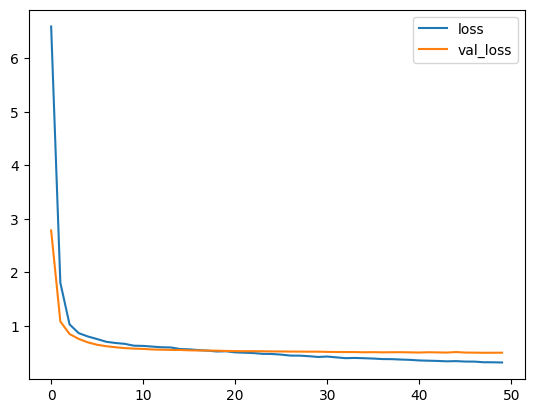

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

In [9]:
import pickle

with open("tl_sex_to_bfi.pkl", "wb") as f:
    pickle.dump(history.history, f)    